source : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
# x is variable, a, b,c are parameters
def func(x,a,b,c):
    return a*np.exp(-b*x)+c

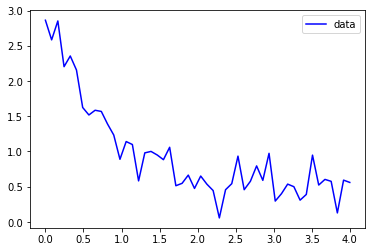

In [3]:
# Define data to be fit with some noise
xdata=np.linspace(0,4,50) # 50 points within 0 to 4
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2*np.random.normal(size = xdata.size)
ydata=y+y_noise
plt.plot(xdata, ydata, 'b', label="data")
plt.legend(loc="best");

In [4]:
# fit the parameters a, b, c of the function func
popt, pcov = curve_fit(func, xdata, ydata)
print(popt) # this is a tuple

[2.55423706 1.35190947 0.47450618]


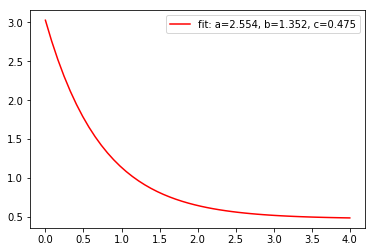

In [5]:
plt.plot(xdata, func(xdata, *popt), 'r-', label = 'fit: a=%5.3f, b=%5.3f, c=%5.3f' %tuple(popt))
plt.legend(loc="best");

In [6]:
# constrain the optimization to the region of 0 <= a <=3, 0<=b<=1 and 0<=c<=0.5:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

array([2.43708906, 1.        , 0.35015434])

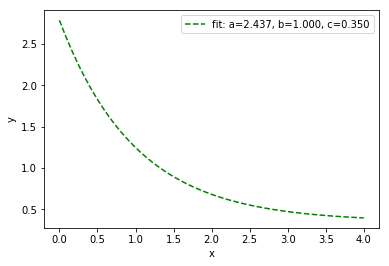

In [7]:
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

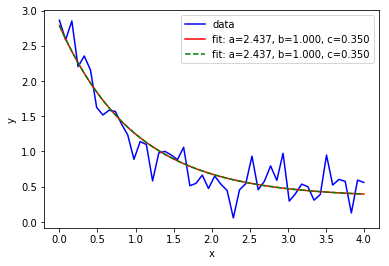

In [8]:
plt.plot(xdata, ydata, 'b', label = 'data')
plt.plot(xdata, func(xdata, *popt), 'r-', label = 'fit: a=%4.3f, b=%5.3f, c=%5.3f' %tuple(popt))
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()